In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 624.5 kB/s eta 0:00:00m eta 0:00:010:00:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 2.5 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:01:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.3 MB/s eta 0:00:001.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 969.5 kB/s eta 0:00:00eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━

  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439678 sha256=1b4d883a79d2e01eb81bf78fffa3af87193061ee957148cfacd922d35cf63192
  Stored in directory: /home/gustavo/.cache/pip/wheels/05/94/dc/81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax
Note: you may need to restart the kernel to use updated packages.


2023-04-13 20:25:51.519569: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 20:25:51.522457: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 20:25:51.568731: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-13 20:25:51.569318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 20:25:55.210659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
tf.__version__

'2.12.0'

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [10]:
df = pd.read_csv('SalesData.csv')

In [18]:
df.reset_index(drop= True, inplace = True)
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [17]:
temp = df['Temperature']
rev = df['Revenue']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


<AxesSubplot: xlabel='Temperature', ylabel='Revenue'>

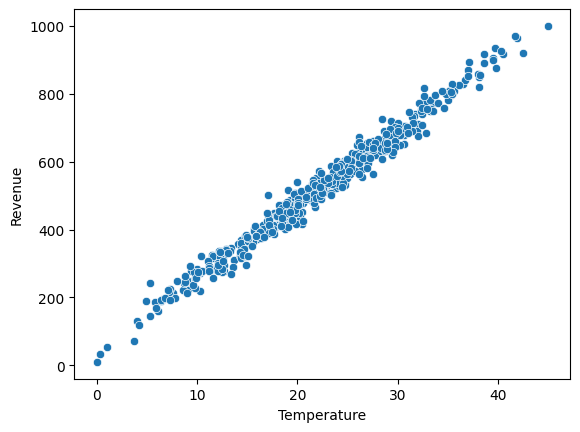

In [20]:
sns.scatterplot(x=temp, y=rev)

In [38]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [31]:
X_train = temp
y_train = rev

In [41]:
epoch_hist = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 646.0315
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 650.1567
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 638.1111
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 629.9927
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 648.5937
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 616.4359
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 693.7452
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 684.4406
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 659.2555
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 678.0147
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 642.7869
Epoch 12/1000
16/16 [==============================] - 0s 1ms/step - loss: 698.1741
E

16/16 [==============================] - 0s 1ms/step - loss: 659.7268
Epoch 99/1000
16/16 [==============================] - 0s 1ms/step - loss: 722.9404
Epoch 100/1000
16/16 [==============================] - 0s 1ms/step - loss: 829.4146
Epoch 101/1000
16/16 [==============================] - 0s 1ms/step - loss: 699.8428
Epoch 102/1000
16/16 [==============================] - 0s 1ms/step - loss: 722.1525
Epoch 103/1000
16/16 [==============================] - 0s 1ms/step - loss: 683.0208
Epoch 104/1000
16/16 [==============================] - 0s 1ms/step - loss: 655.1310
Epoch 105/1000
16/16 [==============================] - 0s 1ms/step - loss: 674.2502
Epoch 106/1000
16/16 [==============================] - 0s 1ms/step - loss: 678.0869
Epoch 107/1000
16/16 [==============================] - 0s 1ms/step - loss: 661.6695
Epoch 108/1000
16/16 [==============================] - 0s 1ms/step - loss: 644.1658
Epoch 109/1000
16/16 [==============================] - 0s 1ms/step - loss: 857.1

16/16 [==============================] - 0s 1ms/step - loss: 699.9574
Epoch 195/1000
16/16 [==============================] - 0s 1ms/step - loss: 681.8809
Epoch 196/1000
16/16 [==============================] - 0s 1ms/step - loss: 696.7330
Epoch 197/1000
16/16 [==============================] - 0s 1ms/step - loss: 685.1737
Epoch 198/1000
16/16 [==============================] - 0s 1ms/step - loss: 703.3891
Epoch 199/1000
16/16 [==============================] - 0s 1ms/step - loss: 639.8385
Epoch 200/1000
16/16 [==============================] - 0s 1ms/step - loss: 646.5599
Epoch 201/1000
16/16 [==============================] - 0s 1ms/step - loss: 685.9178
Epoch 202/1000
16/16 [==============================] - 0s 1ms/step - loss: 761.0706
Epoch 203/1000
16/16 [==============================] - 0s 1ms/step - loss: 717.6372
Epoch 204/1000
16/16 [==============================] - 0s 1ms/step - loss: 705.9647
Epoch 205/1000
16/16 [==============================] - 0s 1ms/step - loss: 704.

16/16 [==============================] - 0s 2ms/step - loss: 743.5333
Epoch 291/1000
16/16 [==============================] - 0s 1ms/step - loss: 696.0189
Epoch 292/1000
16/16 [==============================] - 0s 2ms/step - loss: 642.1619
Epoch 293/1000
16/16 [==============================] - 0s 1ms/step - loss: 647.2041
Epoch 294/1000
16/16 [==============================] - 0s 1ms/step - loss: 688.4112
Epoch 295/1000
16/16 [==============================] - 0s 2ms/step - loss: 766.4530
Epoch 296/1000
16/16 [==============================] - 0s 1ms/step - loss: 710.3549
Epoch 297/1000
16/16 [==============================] - 0s 1ms/step - loss: 653.9432
Epoch 298/1000
16/16 [==============================] - 0s 1ms/step - loss: 635.0559
Epoch 299/1000
16/16 [==============================] - 0s 2ms/step - loss: 687.2866
Epoch 300/1000
16/16 [==============================] - 0s 2ms/step - loss: 640.0903
Epoch 301/1000
16/16 [==============================] - 0s 1ms/step - loss: 647.

16/16 [==============================] - 0s 1ms/step - loss: 737.3951
Epoch 387/1000
16/16 [==============================] - 0s 1ms/step - loss: 736.8728
Epoch 388/1000
16/16 [==============================] - 0s 1ms/step - loss: 643.4901
Epoch 389/1000
16/16 [==============================] - 0s 1ms/step - loss: 638.9857
Epoch 390/1000
16/16 [==============================] - 0s 1ms/step - loss: 707.4409
Epoch 391/1000
16/16 [==============================] - 0s 1ms/step - loss: 709.0599
Epoch 392/1000
16/16 [==============================] - 0s 1ms/step - loss: 696.3359
Epoch 393/1000
16/16 [==============================] - 0s 1ms/step - loss: 639.5539
Epoch 394/1000
16/16 [==============================] - 0s 1ms/step - loss: 708.2757
Epoch 395/1000
16/16 [==============================] - 0s 1ms/step - loss: 710.9178
Epoch 396/1000
16/16 [==============================] - 0s 1ms/step - loss: 714.1446
Epoch 397/1000
16/16 [==============================] - 0s 2ms/step - loss: 726.

16/16 [==============================] - 0s 1ms/step - loss: 660.4301
Epoch 483/1000
16/16 [==============================] - 0s 1ms/step - loss: 638.0662
Epoch 484/1000
16/16 [==============================] - 0s 1ms/step - loss: 664.1956
Epoch 485/1000
16/16 [==============================] - 0s 1ms/step - loss: 635.0980
Epoch 486/1000
16/16 [==============================] - 0s 1ms/step - loss: 654.7915
Epoch 487/1000
16/16 [==============================] - 0s 1ms/step - loss: 671.8185
Epoch 488/1000
16/16 [==============================] - 0s 1ms/step - loss: 650.2064
Epoch 489/1000
16/16 [==============================] - 0s 1ms/step - loss: 640.3546
Epoch 490/1000
16/16 [==============================] - 0s 1ms/step - loss: 716.2050
Epoch 491/1000
16/16 [==============================] - 0s 1ms/step - loss: 631.9944
Epoch 492/1000
16/16 [==============================] - 0s 1ms/step - loss: 655.9937
Epoch 493/1000
16/16 [==============================] - 0s 1ms/step - loss: 680.

16/16 [==============================] - 0s 1ms/step - loss: 634.2141
Epoch 579/1000
16/16 [==============================] - 0s 1ms/step - loss: 662.7014
Epoch 580/1000
16/16 [==============================] - 0s 1ms/step - loss: 622.3235
Epoch 581/1000
16/16 [==============================] - 0s 1ms/step - loss: 675.5092
Epoch 582/1000
16/16 [==============================] - 0s 1ms/step - loss: 715.1758
Epoch 583/1000
16/16 [==============================] - 0s 1ms/step - loss: 647.3343
Epoch 584/1000
16/16 [==============================] - 0s 1ms/step - loss: 668.5815
Epoch 585/1000
16/16 [==============================] - 0s 1ms/step - loss: 668.0623
Epoch 586/1000
16/16 [==============================] - 0s 1ms/step - loss: 644.7538
Epoch 587/1000
16/16 [==============================] - 0s 1ms/step - loss: 642.1605
Epoch 588/1000
16/16 [==============================] - 0s 1ms/step - loss: 663.5731
Epoch 589/1000
16/16 [==============================] - 0s 1ms/step - loss: 652.

16/16 [==============================] - 0s 1ms/step - loss: 643.8962
Epoch 675/1000
16/16 [==============================] - 0s 1ms/step - loss: 657.7287
Epoch 676/1000
16/16 [==============================] - 0s 1ms/step - loss: 684.5463
Epoch 677/1000
16/16 [==============================] - 0s 1ms/step - loss: 631.0432
Epoch 678/1000
16/16 [==============================] - 0s 1ms/step - loss: 644.4749
Epoch 679/1000
16/16 [==============================] - 0s 1ms/step - loss: 646.1368
Epoch 680/1000
16/16 [==============================] - 0s 1ms/step - loss: 702.7528
Epoch 681/1000
16/16 [==============================] - 0s 1ms/step - loss: 635.0988
Epoch 682/1000
16/16 [==============================] - 0s 1ms/step - loss: 639.7400
Epoch 683/1000
16/16 [==============================] - 0s 1ms/step - loss: 754.6547
Epoch 684/1000
16/16 [==============================] - 0s 1ms/step - loss: 648.9380
Epoch 685/1000
16/16 [==============================] - 0s 1ms/step - loss: 749.

16/16 [==============================] - 0s 1ms/step - loss: 638.3069
Epoch 771/1000
16/16 [==============================] - 0s 1ms/step - loss: 659.7928
Epoch 772/1000
16/16 [==============================] - 0s 1ms/step - loss: 643.5420
Epoch 773/1000
16/16 [==============================] - 0s 1ms/step - loss: 736.2622
Epoch 774/1000
16/16 [==============================] - 0s 1ms/step - loss: 783.6296
Epoch 775/1000
16/16 [==============================] - 0s 1ms/step - loss: 743.4516
Epoch 776/1000
16/16 [==============================] - 0s 1ms/step - loss: 776.3082
Epoch 777/1000
16/16 [==============================] - 0s 1ms/step - loss: 720.3520
Epoch 778/1000
16/16 [==============================] - 0s 1ms/step - loss: 668.1796
Epoch 779/1000
16/16 [==============================] - 0s 1ms/step - loss: 665.0444
Epoch 780/1000
16/16 [==============================] - 0s 1ms/step - loss: 636.1713
Epoch 781/1000
16/16 [==============================] - 0s 1ms/step - loss: 664.

16/16 [==============================] - 0s 1ms/step - loss: 669.4289
Epoch 867/1000
16/16 [==============================] - 0s 1ms/step - loss: 657.8619
Epoch 868/1000
16/16 [==============================] - 0s 1ms/step - loss: 656.6482
Epoch 869/1000
16/16 [==============================] - 0s 1ms/step - loss: 632.8078
Epoch 870/1000
16/16 [==============================] - 0s 1ms/step - loss: 732.3127
Epoch 871/1000
16/16 [==============================] - 0s 1ms/step - loss: 693.9683
Epoch 872/1000
16/16 [==============================] - 0s 2ms/step - loss: 639.0168
Epoch 873/1000
16/16 [==============================] - 0s 1ms/step - loss: 724.1727
Epoch 874/1000
16/16 [==============================] - 0s 1ms/step - loss: 720.0748
Epoch 875/1000
16/16 [==============================] - 0s 1ms/step - loss: 649.6230
Epoch 876/1000
16/16 [==============================] - 0s 1ms/step - loss: 635.3505
Epoch 877/1000
16/16 [==============================] - 0s 1ms/step - loss: 672.

16/16 [==============================] - 0s 2ms/step - loss: 647.2776
Epoch 963/1000
16/16 [==============================] - 0s 2ms/step - loss: 650.8300
Epoch 964/1000
16/16 [==============================] - 0s 1ms/step - loss: 686.0528
Epoch 965/1000
16/16 [==============================] - 0s 2ms/step - loss: 638.9625
Epoch 966/1000
16/16 [==============================] - 0s 2ms/step - loss: 711.3434
Epoch 967/1000
16/16 [==============================] - 0s 2ms/step - loss: 658.9094
Epoch 968/1000
16/16 [==============================] - 0s 2ms/step - loss: 644.8149
Epoch 969/1000
16/16 [==============================] - 0s 2ms/step - loss: 657.5935
Epoch 970/1000
16/16 [==============================] - 0s 2ms/step - loss: 674.9348
Epoch 971/1000
16/16 [==============================] - 0s 2ms/step - loss: 661.6500
Epoch 972/1000
16/16 [==============================] - 0s 2ms/step - loss: 656.5161
Epoch 973/1000
16/16 [==============================] - 0s 2ms/step - loss: 640.

In [56]:
model.get_weights()

[array([[ 0.01015896, -0.03316893, -0.03649362, -0.1312657 , -0.04399815,
         -4.1823115 ,  0.08067776, -1.7236451 , -0.04755807, -0.07133447]],
       dtype=float32),
 array([-1.2732784 , -0.60585356, -0.46964264, -0.32227266, -0.27371305,
        -6.055619  ,  0.42679974, -3.8483791 , -0.08176047, -0.177205  ],
       dtype=float32),
 array([[ 0.08014012],
        [ 0.03983371],
        [ 0.00805356],
        [-0.08339241],
        [-0.03919796],
        [-4.2827406 ],
        [ 0.0731961 ],
        [-1.8123139 ],
        [ 0.04909799],
        [ 0.19415149]], dtype=float32),
 array([11.593902], dtype=float32)]

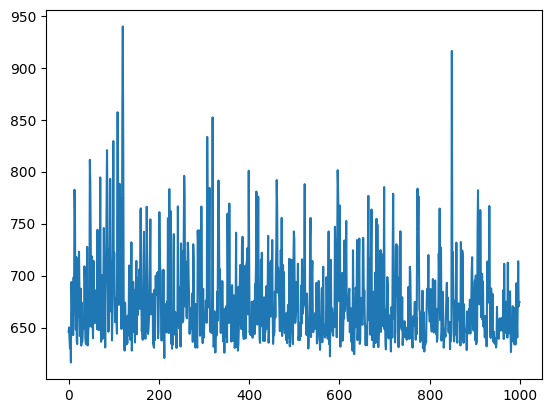

In [42]:
epoch_hist.history.keys()
plt.plot(epoch_hist.history['loss'])

In [46]:
temp = 5

predict = model.predict([temp])
print(predict)

1/1 [==============================] - 0s 26ms/step
[[149.58916]]


16/16 [==============================] - 0s 1ms/step


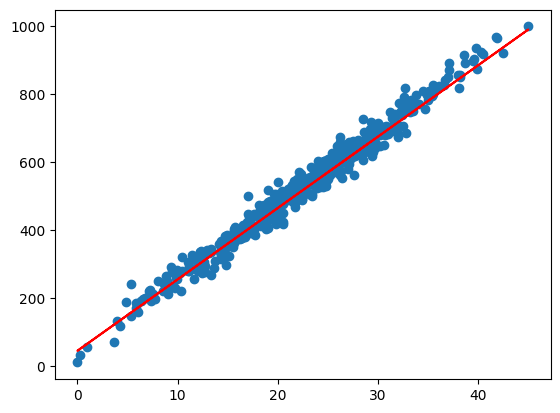

In [49]:
plt.scatter(X_train, y_train)

plt.plot(X_train, model.predict(X_train), color= 'red')

In [51]:
X_train = X_train.values.reshape(-1,1)

In [52]:
y_train = y_train.values.reshape(-1,1)

In [53]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
temp = 5

reg = regressor.predict([[temp]])

reg

array([[152.04939464]])